In [1]:
import numpy as np
import torch
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
n_dots = 500
x1 = torch.linspace(-2, 2, n_dots).view(-1, 1)
x2 = torch.linspace(-2, 2, n_dots).view(-1, 1)
y_data = (1 + torch.sin(2* x1 + 3 * x2))/(3.5 + torch.sin(x1 -x2)) + 0.1 * torch.randn(x1.size())
x_data = torch.cat((x1, x2), -1)

train_set_input, test_set_input, train_set_output, test_set_output = train_test_split(x_data, y_data, test_size=0.2,shuffle=True)
# train_set_input, val_set_input, train_set_output, val_set_output = train_test_split(train_set_input, train_set_output, test_size=2./6,shuffle=True)

In [3]:
# 2 构建网络
neure = 6
net = nn.Sequential(
    nn.Linear(2, neure),
    nn.ReLU(),
    nn.Linear(neure, neure),
    nn.ReLU(),
    nn.Linear(neure, 1),
    nn.Sigmoid(),
)

# 3 定义优化器和损失函数
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) 

# 4 训练网络
max_epoch = 500
l_arr = []
for i in range(max_epoch):
    predict = net(torch.FloatTensor(train_set_input))
    l = loss(torch.FloatTensor(train_set_output), predict)
    optimizer.zero_grad()    
    l.backward()
    optimizer.step()
    l_arr.append(l.item())

predict = net(torch.FloatTensor(test_set_input))
test_loss = loss(torch.FloatTensor(test_set_output), predict)
print('train_loss:%.6f , test_loss:%.6f' % (torch.FloatTensor(l_arr).mean(), test_loss))

train_loss:0.044444 , test_loss:0.039779


train_loss:0.044444 , test_loss:0.039779


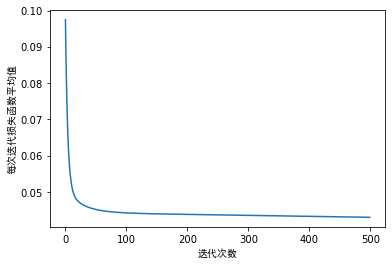

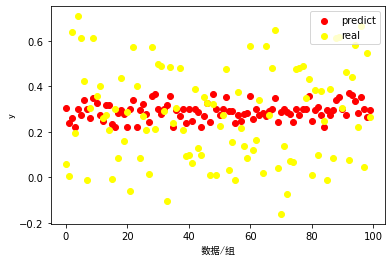

torch.Size([6, 2])
tensor([[-0.1836,  0.5532],
        [-0.3710, -0.6354],
        [-0.6748,  0.0095],
        [ 0.1022,  0.6528],
        [ 0.0795, -0.1438],
        [-0.5756, -0.1320]])
torch.Size([6])
tensor([ 0.3399,  0.4979, -0.6420, -0.6760,  0.6556,  0.1766])
torch.Size([6, 6])
tensor([[-0.2616,  0.2255, -0.0404,  0.1652, -0.0909, -0.1129],
        [-0.2581, -0.0277, -0.1133, -0.0522, -0.0622, -0.1858],
        [-0.0547,  0.1801,  0.0756, -0.3961, -0.0168,  0.0619],
        [-0.0472, -0.1826, -0.2215,  0.1138, -0.1735,  0.0709],
        [ 0.1260,  0.0957,  0.0760, -0.2823, -0.2801,  0.2575],
        [ 0.0599, -0.1424,  0.2374, -0.4163,  0.3074,  0.1478]])
torch.Size([6])
tensor([-0.2908, -0.1184,  0.2808, -0.3893,  0.5002,  0.4924])
torch.Size([1, 6])
tensor([[-0.3086, -0.1934, -0.3405,  0.3762, -0.3315, -0.5896]])
torch.Size([1])
tensor([-0.2172])


In [4]:
#5 测试网络效果
predict = net(torch.FloatTensor(test_set_input))
test_loss = loss(torch.FloatTensor(test_set_output), predict)
print('train_loss:%.6f , test_loss:%.6f' % (torch.FloatTensor(l_arr).mean(), test_loss))

# 图1
x = np.arange(max_epoch)
y = np.array(l_arr)
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
plt.plot(x, y)
# plt.title('损失函数随迭代次数变化图像', fontproperties=myfont)
plt.xlabel('迭代次数', fontproperties=myfont)
plt.ylabel('每次迭代损失函数平均值', fontproperties=myfont)
plt.savefig('../../期末作业/figures/5个隐藏层单元个数图_loss.png', dpi=900)
plt.show()

#图2
x = np.arange(test_set_input.shape[0])
y1 = np.array(predict.detach().numpy())
y2 = np.array(test_set_output)
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
line1 = plt.scatter(x, y1, c='red')
line2 = plt.scatter(x, y2, c='yellow')
plt.legend([line1, line2], ["predict", "real"], loc=1)
# plt.title('预测值与实际值', fontproperties=myfont)
plt.xlabel('数据/组', fontproperties=myfont)
plt.ylabel('y', fontproperties=myfont)
plt.savefig('../../期末作业/figures/5个隐藏层单元个数图_实际.png', dpi=900)
plt.show()
#ps 查看权重
for param in net.parameters():
    print(param.shape)
    print(param.data)

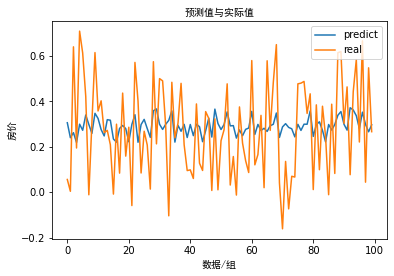

In [5]:
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
line1, = plt.plot(x, y1)
line2, = plt.plot(x, y2)
plt.legend([line1, line2], ["predict", "real"], loc=1)
plt.title('预测值与实际值', fontproperties=myfont)
plt.xlabel('数据/组', fontproperties=myfont)
plt.ylabel('房价', fontproperties=myfont)
plt.show()